# Daily end-of-day N225 Dec Futures Prices from 1 Sep to 15 Oct, 1999

In [1]:
import numpy as npt
import pandas as pd
df = pd.read_csv('N225.csv')
df.head(), len(df)

(   N225index  ContrYr      Date    Time  FutPrice  Days_to_mat
 0   17479.57     1999  19990901  141737     17740           98
 1   17630.32     1999  19990902  142445     17645           97
 2   17559.40     1999  19990903  142444     17515           96
 3   17664.06     1999  19990906  142457     17790           93
 4   17651.94     1999  19990907  142456     17690           92,
 30)

In [2]:
futpr=df['FutPrice']
spotpr=df['N225index']
ttm=df['Days_to_mat']/365

In [3]:
### Assume transactions cost 0.5% (brokerage and exchange fees)
### Assume N225 portfolio aggregate dividend was 1.0% p.a.
### Assume Japanese riskfree rate was 0.5% p.a.
fairpr = [0] * 30

for i in range(30):
  if futpr[i] > spotpr[i]:
    fairpr[i] = 1.01*(spotpr[i] - 0.01*spotpr[i]*ttm[i]/(1+0.005*ttm[i]))*(1+0.005*ttm[i])
  else: 
    fairpr[i] = 0.99*(spotpr[i]- 0.01*spotpr[i]*ttm[i]/(1+0.005*ttm[i]))*(1+0.005*ttm[i])


In [4]:
spotpr*0.01*ttm

0     46.931448
1     46.853179
2     46.183627
3     45.007057
4     44.492561
5     43.654395
6     43.587814
7     42.888368
8     41.787989
9     41.010311
10    39.257066
11    38.926568
12    38.176942
13    38.003848
14    36.860706
15    35.128961
16    34.102707
17    33.784920
18    33.674341
19    33.666099
20    33.581378
21    32.445035
22    32.142814
23    31.581630
24    31.537026
25    30.922040
26    29.232463
27    28.212614
28    27.644594
29    26.866361
dtype: float64

In [5]:
time = np.array(range(len(df['Time'])))
print(time)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


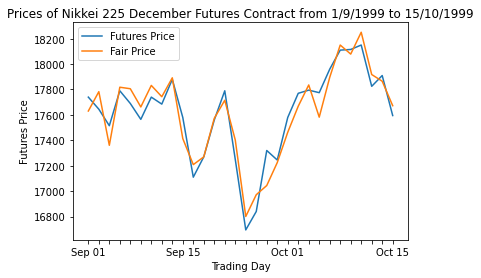

In [6]:
import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, futpr)
plt.plot(time, fairpr)
plt.xticks(np.arange(30), ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','',
                           '','','','','','','','','Oct 15'])
# naming the x axis
plt.xlabel('Trading Day')
# naming the y axis
plt.ylabel('Futures Price')
# giving a title to my graph
plt.title('Prices of Nikkei 225 December Futures Contract from 1/9/1999 to 15/10/1999')
plt.legend(['Futures Price', 'Fair Price'])
# function to show the plot
plt.show()

In [7]:
p=(futpr-fairpr)/fairpr

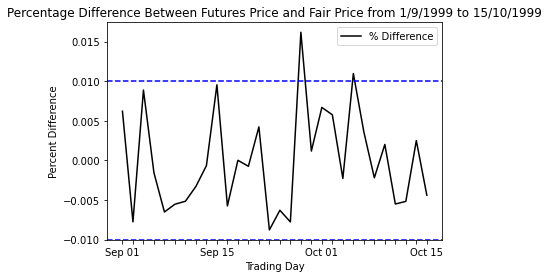

In [8]:
plt.plot(time, p,color='black')
plt.xticks(np.arange(30), ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','',
                           '','','','','','','','','Oct 15'])
# naming the x axis
plt.xlabel('Trading Day')
# naming the y axis
plt.ylabel('Percent Difference')
plt.axhline(y = 0.01, color = 'b', linestyle = '--')
plt.axhline(y = -0.01, color = 'b', linestyle = '--')
# giving a title to my graph
plt.title('Percentage Difference Between Futures Price and Fair Price from 1/9/1999 to 15/10/1999')
plt.legend(['% Difference'])
# function to show the plot
plt.show()

# Regression of Change ln(F_t/F*_t ) on Its Lag

In [9]:
Y=np.log(futpr/fairpr)
len(Y)

30

In [10]:
dY=(Y-Y.shift(1)).dropna()
dY0=dY[1:,]
dY1=dY.shift(1).dropna()   ### dY1 is lagged one period dY0
len(dY0),len(dY1)

(28, 28)

In [11]:
import statsmodels.api as sm
y = dY0
x = dY1
 
# defining the variables
x = x.tolist()
y = y.tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     13.99
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           0.000916
Time:                        10:56:08   Log-Likelihood:                 97.874
No. Observations:                  28   AIC:                            -191.7
Df Residuals:                      26   BIC:                            -189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.543e-05      0.001      0.032      0.9

In [12]:
print('Parameters: ', result.params[0],result.params[1])
print('R2: ', result.rsquared)
print('Adj R2: ', result.rsquared_adj)
print('SSR: ', result.ssr)
print('S.E. of Reg: ', np.sqrt(result.mse_resid))
print('F: ', result.fvalue)
print('Prob(F): ', result.f_pvalue)

Parameters:  4.5429137960791596e-05 -0.5735640477623958
R2:  0.3498828558055682
Adj R2:  0.3248783502596285
SSR:  0.0015084444613336688
S.E. of Reg:  0.0076168953430304906
F:  13.992792425458838
Prob(F):  0.0009159594936157783


# Plot of Residuals

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
mu, std = stats.norm.fit(result.resid)
mu, std

(-3.097720492815727e-20, 0.007339824008530618)

In [14]:
re=result.resid
print(re)

[ 8.56440680e-03 -9.16762822e-04 -1.09780529e-02 -1.90876558e-03
  8.95476478e-04  2.05529951e-03  3.66304518e-03  1.16170391e-02
 -9.47620054e-03 -3.02312081e-03  2.50823636e-03  4.48502184e-03
 -1.02336129e-02 -5.02206162e-03 -9.60098315e-05  2.29508062e-02
 -1.23550215e-03 -3.08887811e-03  2.17134952e-03 -8.59182397e-03
  8.54130184e-03  2.01403954e-04 -1.00280942e-02  8.42233813e-04
 -5.16494921e-03 -4.03190714e-03  7.83689165e-03 -2.53677054e-03]


Text(0, 0.5, 'pdf with histogram')

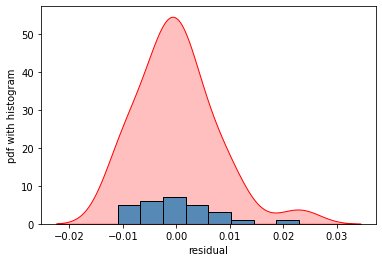

In [15]:
import seaborn as sns
sns.histplot(result.resid)
sns.kdeplot(result.resid, color='r', shade=True)

plt.xlabel("residual")
plt.ylabel("pdf with histogram")

# Hedging

In [17]:
### Form a hedge portfolio comprising V_t = f x S_t Yen (V_t is value of diversified portfolio of Jap stocks, S_t = N225 Index)
###   and h number of short N225 index futures contracts. Notional value of futures contract = 500 x F in Yen per contract.
### Change in hedged Portfolio Value P_t+1 - P_t = f x (S_t+1 - S_t) - h x 500 x (F_t+1 - F_t). Minimize var(P_t+1 - P_t)
### optimal h* = cov(S_t+1 - S_t,F_t+1 - F_t) x f/500
### Current N225 Index on 1 Sep is 17479.57; suppose portfolio value is 10 billion Yen to be hedged, f = 10B/17479.57 
f = round(10000000000/17479)

In [18]:
f

572115

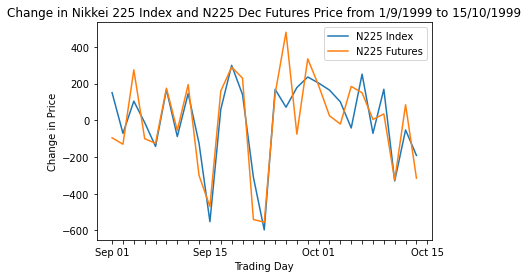

In [19]:
CS=(spotpr-spotpr.shift(1)).dropna()
CF=(futpr-futpr.shift(1)).dropna()
time1 = np.array(range(len(CS)))

plt.plot(time1,CS)
plt.plot(time1,CF)
plt.xticks(np.arange(30), ['Sep 01','','','','','','','','','Sep 15','','','','','','','','','','Oct 01','',
                           '','','','','','','','','Oct 15'])
# naming the x axis
plt.xlabel('Trading Day')
# naming the y axis
plt.ylabel('Change in Price')
# giving a title to my graph
plt.title('Change in Nikkei 225 Index and N225 Dec Futures Price from 1/9/1999 to 15/10/1999')
plt.legend(['N225 Index', 'N225 Futures'])
# function to show the plot
plt.show()


In [20]:
import statsmodels.api as sm

# defining the variables
#x = x.tolist()
#y = y.tolist()
 
CF = sm.add_constant(CF)
result2 = sm.OLS(CS, CF).fit()
# printing the summary table
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              N225index   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     59.66
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.63e-08
Time:                        10:56:08   Log-Likelihood:                -181.12
No. Observations:                  29   AIC:                             366.2
Df Residuals:                      27   BIC:                             369.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6663     24.020      0.194      0.8

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
beta = result2.params[1]
optimal_h = beta*f/500 
print(optimal_h)

818.9830777950907


In [22]:
### Above assumes we know the data forward at 1 Sep. That is just for demonstration. In principle, we should obtain more past
###  data just prior to 1 Sep to estimate the beta.